In [1]:
!pip install yfinance


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
symbols = ['^DJI', '^IXIC', '^GSPC']
start_date = '2012-04-29'
end_date = '2022-04-29'

data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


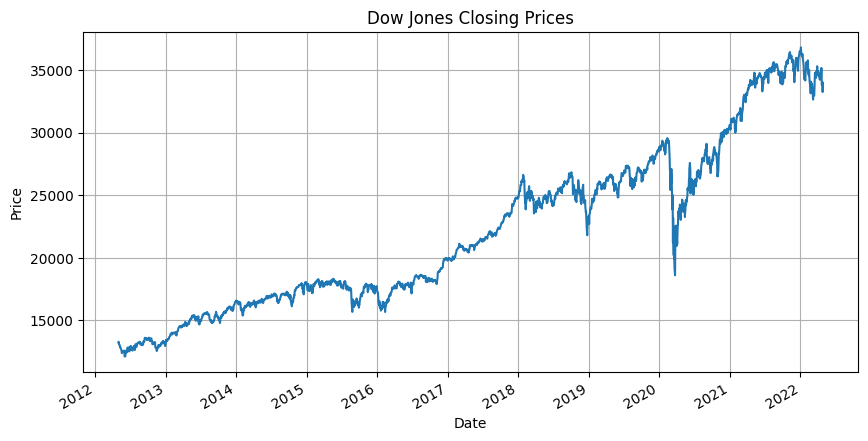

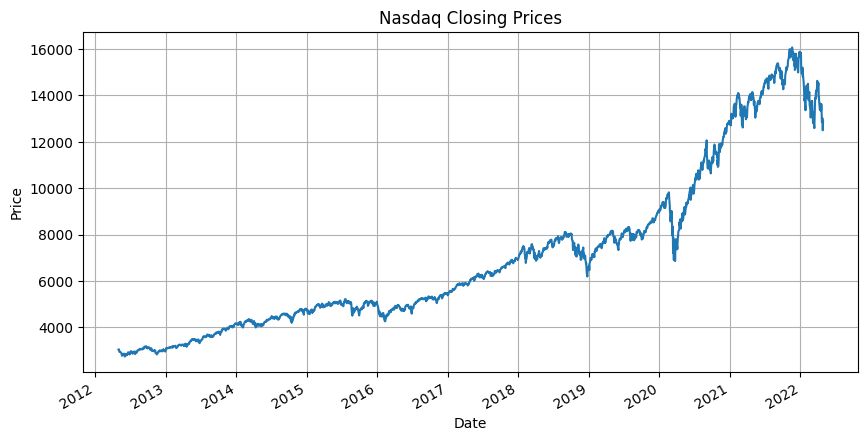

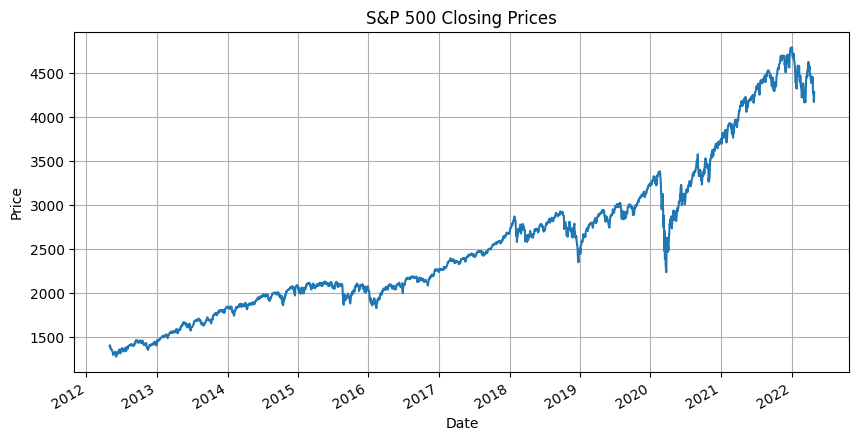

In [27]:
for symbol, df in data.items():
    plt.figure(figsize=(10, 5))
    df['Close'].plot()
    plt.title(f'{index_names[symbol]} Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


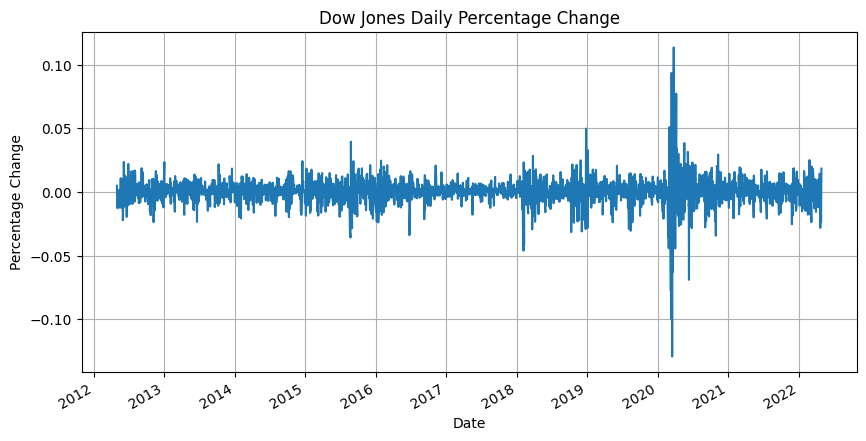

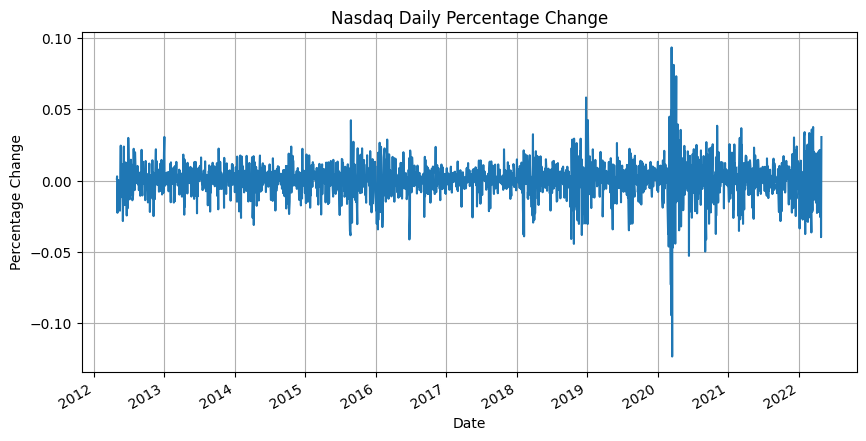

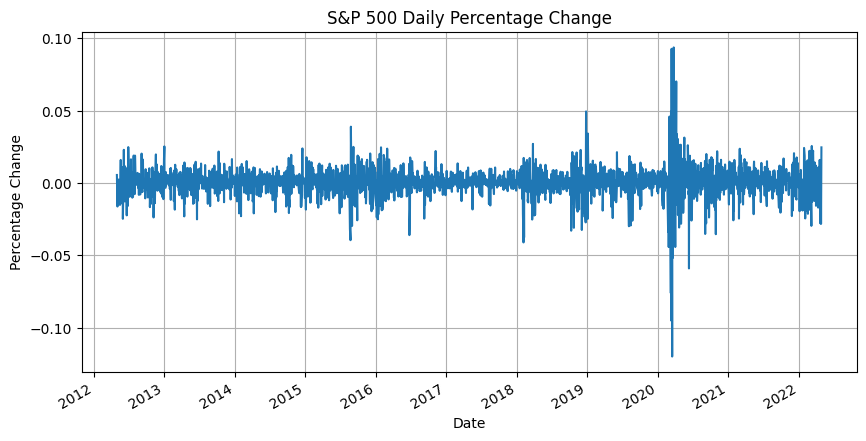

In [28]:
for symbol, df in data.items():
    df['Daily Change'] = df['Close'].pct_change()
    plt.figure(figsize=(10, 5))
    df['Daily Change'].plot()
    plt.title(f'{index_names[symbol]} Daily Percentage Change')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.grid(True)
    plt.show()


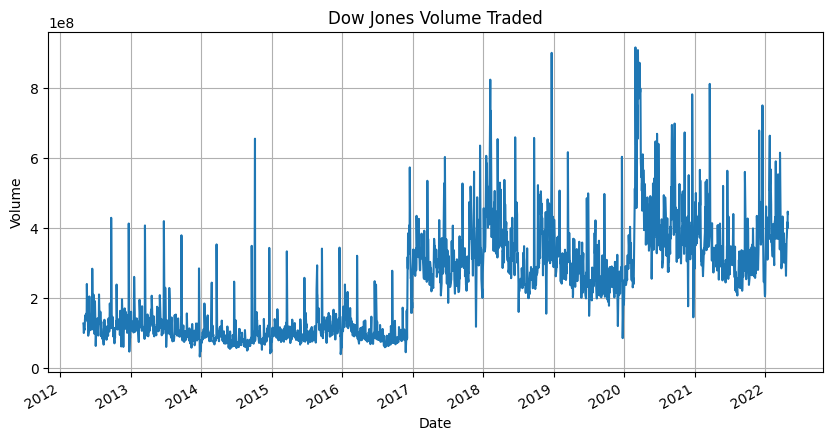

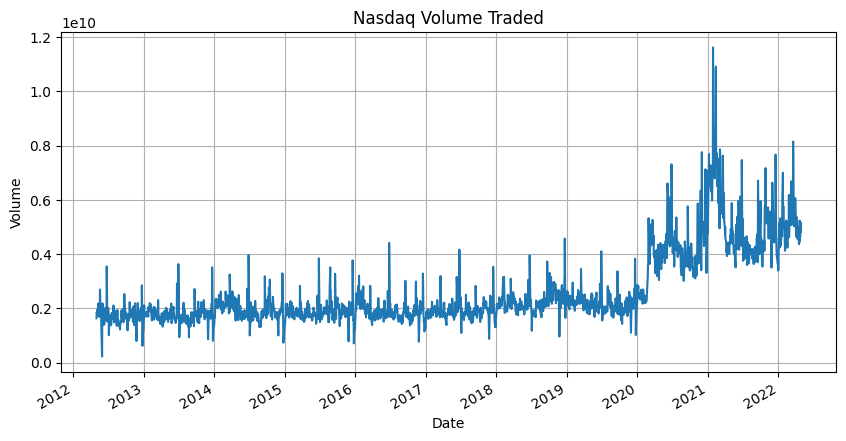

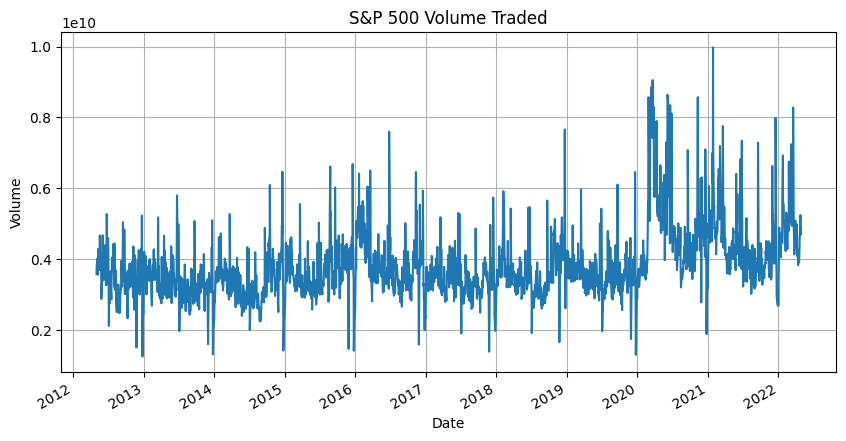

In [29]:
for symbol, df in data.items():
    plt.figure(figsize=(10, 5))
    df['Volume'].plot()
    plt.title(f'{index_names[symbol]} Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.show()


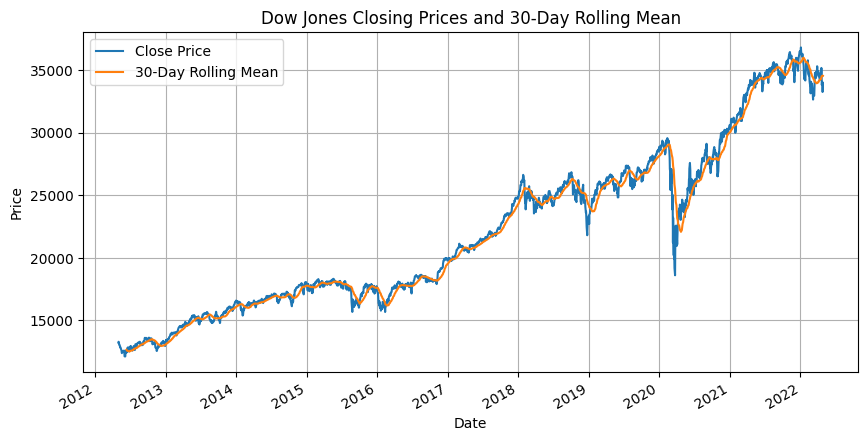

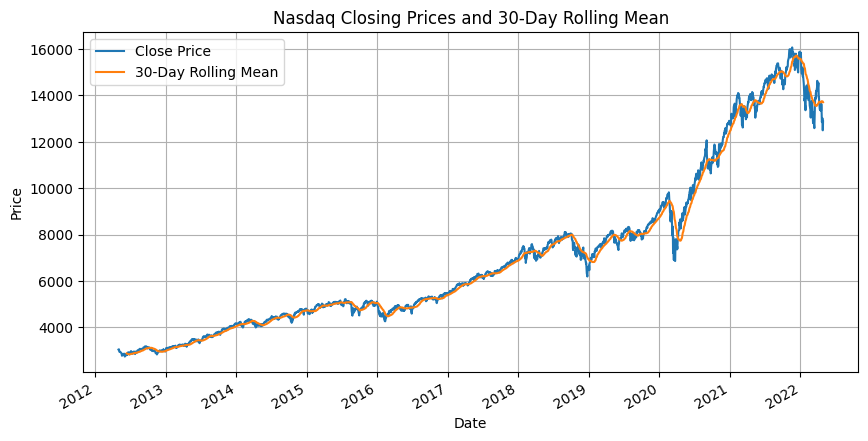

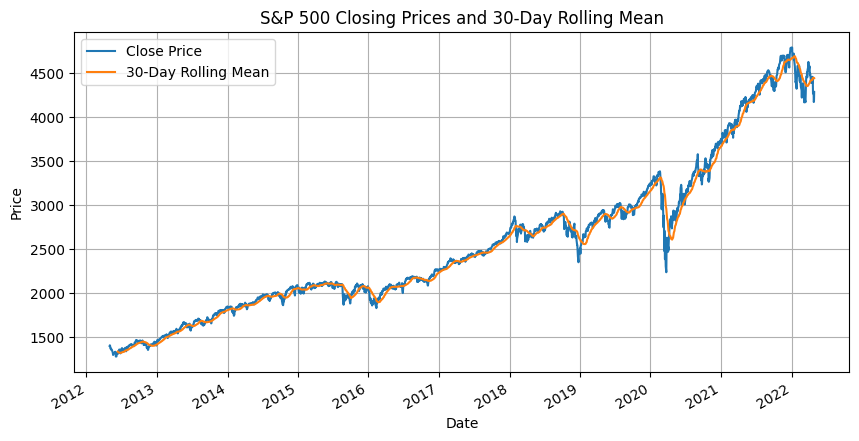

In [30]:
window = 30  # Choose a window size for the rolling average
index_names = {'^DJI': 'Dow Jones', '^IXIC': 'Nasdaq', '^GSPC': 'S&P 500'}
for symbol, df in data.items():
    df['Rolling Mean'] = df['Close'].rolling(window=window).mean()
    plt.figure(figsize=(10, 5))
    df['Close'].plot(label='Close Price')
    df['Rolling Mean'].plot(label=f'{window}-Day Rolling Mean')
    plt.title(f'{index_names[symbol]} Closing Prices and {window}-Day Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


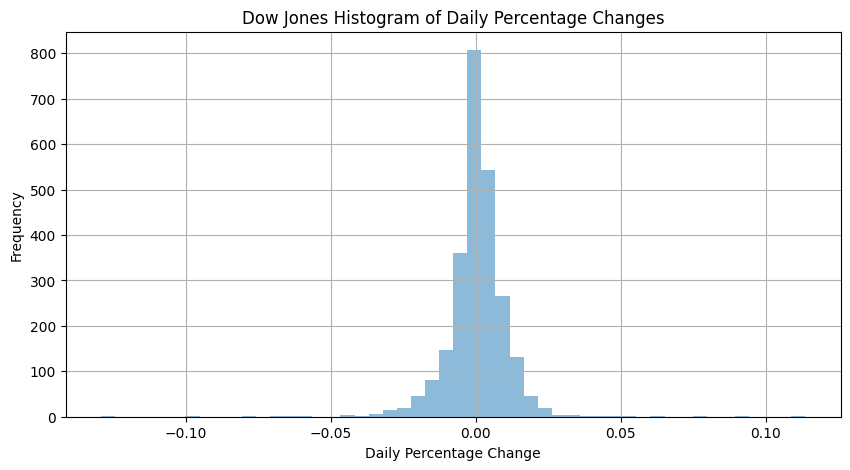

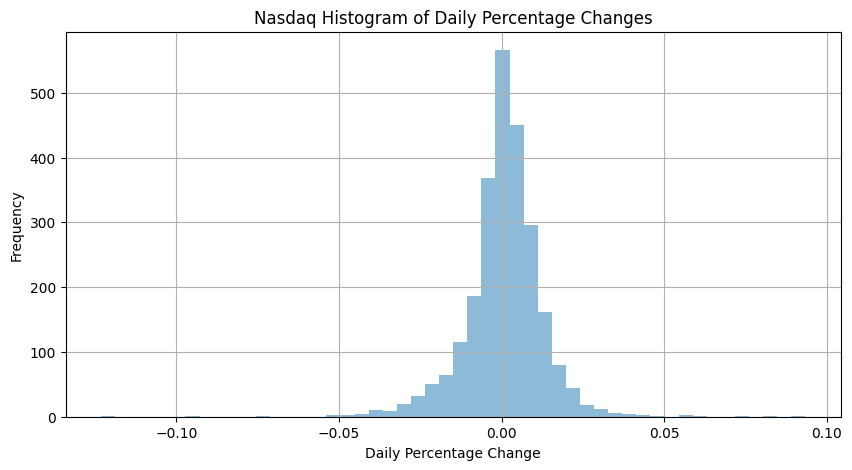

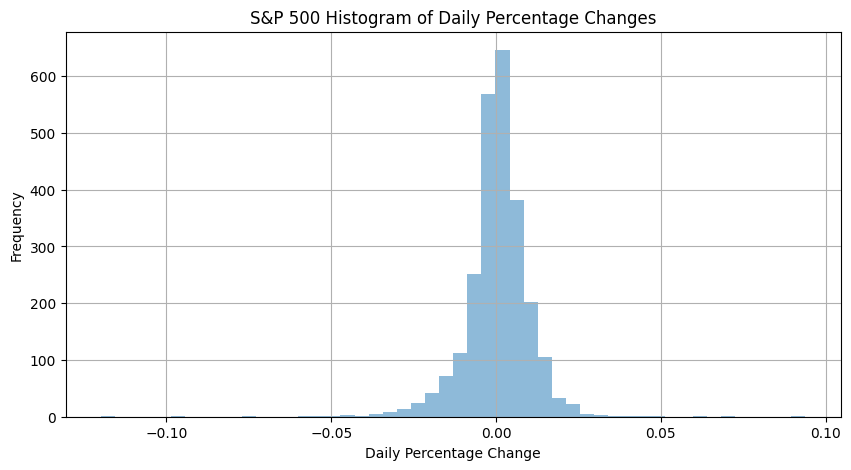

In [25]:
index_names = {'^DJI': 'Dow Jones', '^IXIC': 'Nasdaq', '^GSPC': 'S&P 500'}
for symbol, df in data.items():
    plt.figure(figsize=(10, 5))
    df['Daily Change'].hist(bins=50, alpha=0.5)
    plt.title(f'{index_names[symbol]} Histogram of Daily Percentage Changes')
    plt.xlabel('Daily Percentage Change')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [10]:
!pip install --upgrade mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


In [14]:
symbols = ['^DJI', '^IXIC', '^GSPC']
start_date = '2024-01-29'
end_date = '2024-04-29'

data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


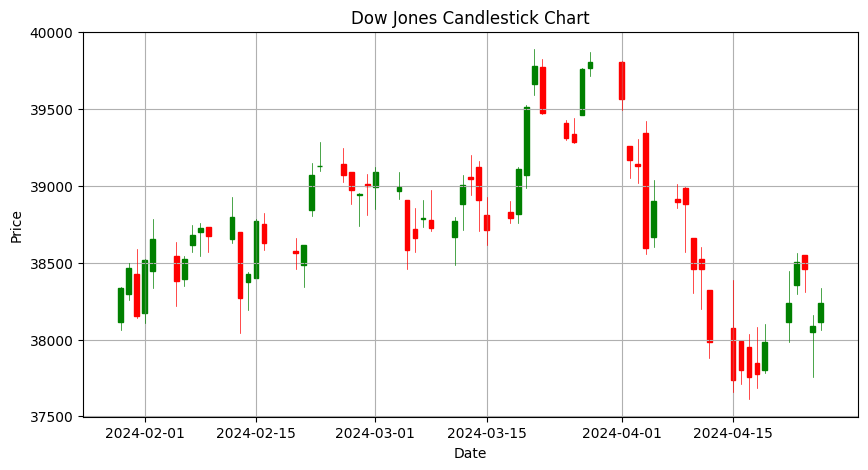

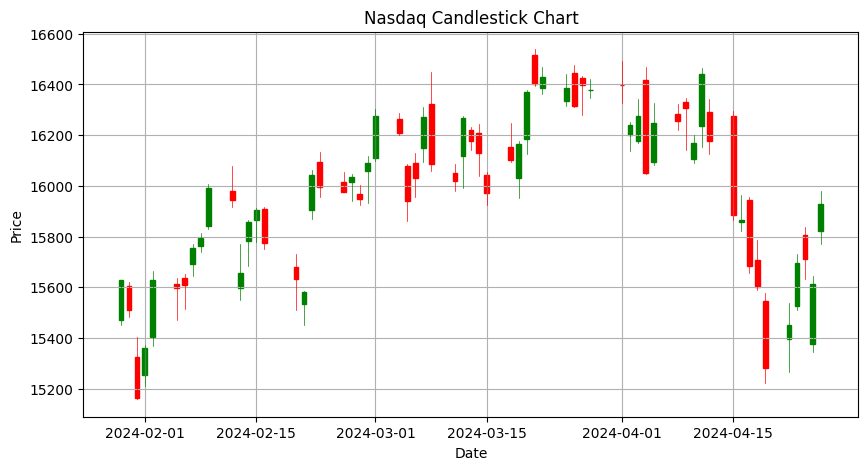

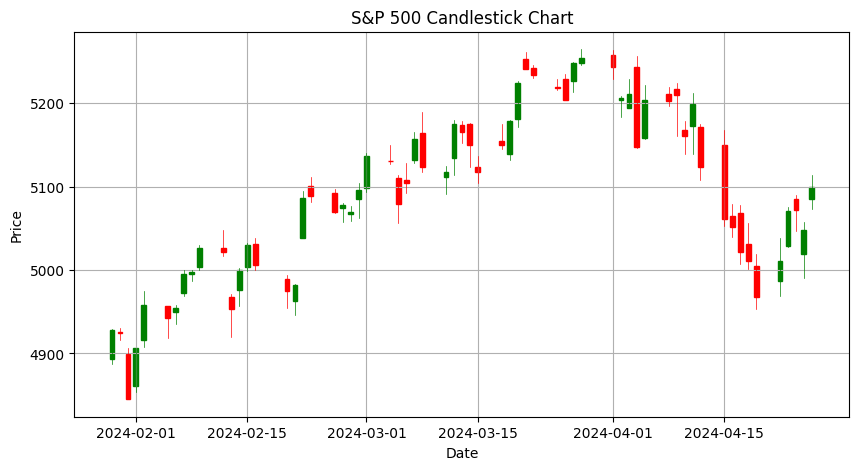

In [16]:
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

index_names = {'^DJI': 'Dow Jones', '^IXIC': 'Nasdaq', '^GSPC': 'S&P 500'}


for symbol, df in data.items():
    df_reset = df.reset_index()
    df_reset['Date'] = df_reset['Date'].apply(mdates.date2num)

    fig, ax = plt.subplots(figsize=(10, 5))
    candlestick_ohlc(ax, df_reset.values, width=0.6, colorup='green', colordown='red')
    ax.xaxis_date()
    ax.grid(True)
    plt.title(f'{index_names[symbol]} Candlestick Chart')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
